In [ ]:
##########################################################################################
#                                                                                        #
#  888888b.  8888888 .d88888b.   .d8888b.     .d8888b.   .d8888b.      d8888      d8888  #
#  888  "88b   888  d88P" "Y88b d88P  Y88b   d88P  Y88b d88P  Y88b    d8P888     d8P888  #
#  888  .88P   888  888     888 Y88b.        888        888          d8P 888    d8P 888  #
#  8888888K.   888  888     888  "Y888b.     888d888b.  888d888b.   d8P  888   d8P  888  #
#  888  "Y88b  888  888     888     "Y88b.   888P "Y88b 888P "Y88b d88   888  d88   888  #
#  888    888  888  888     888       "888   888    888 888    888 8888888888 8888888888 #
#  888   d88P  888  Y88b. .d88P Y88b  d88P   Y88b  d88P Y88b  d88P       888        888  #
#  8888888P" 8888888 "Y88888P"   "Y8888P"     "Y8888P"   "Y8888P"        888        888  #
#                                                                                        # 
##########################################################################################
#
# BIOS 6644 Final Project
#
##########################################################################################

## Purpose of Wrangle


The data for this project comes from a randomized dental study whose goal is to learn about a new gel treatment for gum disease by checking the effects of its active ingredients on teeth. In their study, subjects were randomly assigned to one of 5 treatments: no treatment and four levels of an active substance in a gel. The lowest level was a placebo (=1) and then another control group (=2), like the "no treatment" group. The remaining three levels were low(=3), medium(=4), and high(=5) concentrations of the active ingredient in the gel.To achieve this result, the study will evaluate the pocket depth and attachment loss 1 year after applying the gel on the patients ’gum. Patients were checked at baseline and then after 1 year of treatment by looking at the Pocket depth and attachment loss of their teeth. The outcomes of this study are the difference in pocket depth and attachment loss.


## Sample of input data

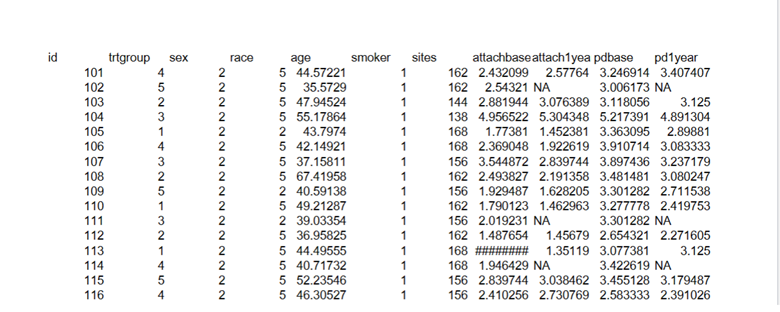

In [1]:
#Load screenshot  of the data
# Code adapted from https://stackoverflow.com/questions/32370281/how-to-embed-image-or-picture-in-jupyter-notebook-either-from-a-local-machine-o
from IPython.display import Image
PATH = "C:\\Users\\owner\\Pictures\\"
Image(filename = PATH + "Wrangling.png", width=1000, height=1000)

## Strategy and libraries utilized

In [1]:
#Import libraries 
import pandas as pd #to read csv file
import numpy as np #for maths operations
import seaborn as sns # to make plots
import pylab as plt # to make plots

In [2]:
#load dataset
df = pd.read_csv("C:/Users/owner/Downloads/Project0_dental_data.csv")

df



id  trtgroup  sex  race        age  smoker  sites  attachbase  \
0    101         4    2     5  44.572211     1.0    162    2.432099   
1    102         5    2     5  35.572895     1.0    162    2.543210   
2    103         2    2     5  47.945243     1.0    144    2.881944   
3    104         3    2     5  55.178645     1.0    138    4.956522   
4    105         1    2     2  43.797399     1.0    168    1.773810   
..   ...       ...  ...   ...        ...     ...    ...         ...   
125  266         4    1     5  55.852156     0.0    162    1.709877   
126  267         5    1     5  51.635866     0.0    156    1.673077   
127  268         2    1     5  56.793977     0.0    144    2.305556   
128  269         3    1     5  64.900753     0.0    162    4.080247   
129  270         1    1     5  63.545517     0.0    168    2.136905   

     attach1year    pdbase   pd1year  
0       2.577640  3.246914  3.407407  
1            NaN  3.006173       NaN  
2       3.076389  3.118056  3.125000  
3       5.304348  5.217391  4.891304  
4       1.452381  3.363095  2.898810  
..           ...       ...       ...  
125          NaN  2.925926       NaN  
126          NaN  2.788462       NaN  
127     2.256944  3.340278  3.159722  
128     3.685185  3.370370  3.265432  
129     2.184524  3.130952  3.291667  

[130 rows x 11 columns]

In [4]:
#before trying to answer the questions at hand,let's examine the data 
# See all columns
print(f"Column Names:  {df.columns}")
    

Column Names:  Index(['id', 'trtgroup', 'sex', 'race', 'age', 'smoker', 'sites', 'attachbase',
       'attach1year', 'pdbase', 'pd1year'],
      dtype='object')


In [18]:
# Get  summaries of numerical fields
df.describe()

id         age       sites  attachbase  attach1year  \
count  130.000000  129.000000  130.000000  130.000000   103.000000   
mean   182.815385   49.943471  157.507692    2.146075     2.101389   
std     54.988200   10.032327   11.341251    0.797052     0.771884   
min    101.000000   28.572211  114.000000    0.895062     0.865385   
25%    133.250000   41.982204  150.000000    1.579226     1.462963   
50%    166.500000   48.629706  162.000000    2.027473     1.978261   
75%    237.750000   55.852156  168.000000    2.584877     2.511748   
max    270.000000   74.532512  168.000000    5.089286     5.304348   

           pdbase     pd1year  
count  130.000000  103.000000  
mean     3.138371    2.875163  
std      0.436721    0.487555  
min      2.262821    1.964286  
25%      2.851521    2.516173  
50%      3.098077    2.904762  
75%      3.336360    3.173077  
max      5.217391    4.891304

These are the tasks that need to be completed:
1. Relabel categorical variables 
2. Investigate race variable
3. Replace missing outcomes values with the mean  
4. Plot outcomes
5. Create new variables for the change of Pocket depth and attachment loss 


# Task 1: Relabel categorical variables:Race,sex,smoker,treatment 


Based on the data dictionary for each of these variables, I will be matching them to their corresponding group.

In [3]:
# Code adapted from https://stackoverflow.com/questions/69224097/how-do-you-replace-pandas-row-numeric-values-with-string
#Becauve the columns  values are numeric, I will be first converting the column to a string before replacing it with the values
#that I want
#Race variable
df['race'] = df['race'].astype(str).replace(['5', '4','2','1'], ['white', 'Asian','African American','Native American'])

In [4]:
#Sex variable
df['sex'] = df['sex'].astype(str).replace(['1', '2'], ['Male','Female'])
#df["sex"].value_counts()

In [5]:
#smoker variable 
df['smoker'] = df['smoker'].astype(str).replace(['1.0', '0.0'], ['Yes','No'])

In [6]:
#treatment variable
df['trtgroup'] = df['trtgroup'].astype(str).replace(['1', '2','3','4','5'], ['Placebo','No Treatment',
                    'Low Concentration','Medium Concentration','High Concentration'])

# Task 2: Investigate race variable

<Axes: xlabel='race', ylabel='Count'>

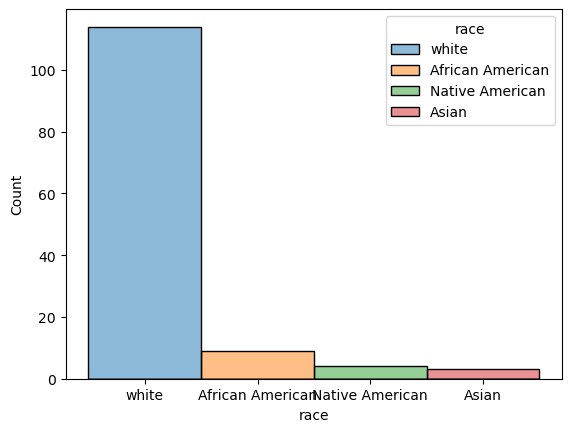

In [7]:
#Make histogram to understand distribution of race
#sns.histplot(df["race"], kde=True)
sns.histplot(data=df, x="race", hue="race")

It seems that the distribution is right skewed with white being the majority.Question for the PI: How to approach this unbalance in the race variable? Should we create two categories,that is white and other including the African American, Native American and Asian?

# Task 3: Replace missing values with the mean of that variable .


In [8]:
#count NAs
print(df.isnull().sum())


id              0
trtgroup        0
sex             0
race            0
age             1
smoker          0
sites           0
attachbase      0
attach1year    27
pdbase          0
pd1year        27
dtype: int64


We can see that the outcomes at one year are the ones that are missing the most. Per agreement from the PI,
we will be using the mean of each outcome and replacing the missing value by the mean.

In [10]:
#Code adapted from https://stackoverflow.com/questions/18689823/pandas-dataframe-replace-nan-values-with-average-of-columns
df['attach1year'].fillna((df['attach1year'].mean()), inplace=True)
df['pd1year'].fillna((df['pd1year'].mean()), inplace=True)
df['age'].fillna((df['age'].mean()), inplace=True)

In [11]:
#recheck that it works and we don't have anymore missing values.
print(df.isna().sum())

id             0
trtgroup       0
sex            0
race           0
age            0
smoker         0
sites          0
attachbase     0
attach1year    0
pdbase         0
pd1year        0
dtype: int64


# Task 4: Plot outcomes

The goal here is to overlay the distributions at baseline with the one year to see if there are any obvious differences 
that are noticeable.

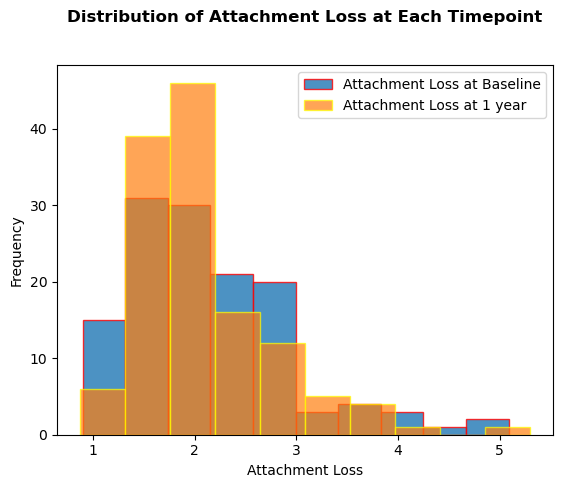

In [12]:
#Code adapted from https://www.geeksforgeeks.org/how-to-plot-two-histograms-together-in-matplotlib/
#Attachment Loss Outcome
# plotting first histogram
plt.hist(df['attachbase'], label='Attachment Loss at Baseline', alpha=.8, edgecolor='red')
 
# plotting second histogram
plt.hist(df['attach1year'], label='Attachment Loss at 1 year', alpha=0.7, edgecolor='yellow')
plt.xlabel('Attachment Loss')
plt.ylabel('Frequency')
 
plt.title('Distribution of Attachment Loss at Each Timepoint\n\n',
          fontweight = "bold")
plt.legend()
 
# Showing the plot using plt.show()
plt.show()
#sns.histplot(df["attachbase"])


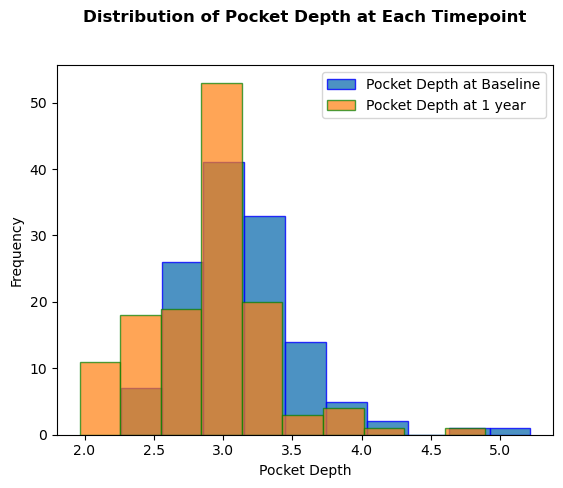

In [13]:
#Pocket Depth Outcomes
# plotting first histogram
plt.hist(df['pdbase'], label='Pocket Depth at Baseline', alpha=.8, edgecolor='blue')
 
# plotting second histogram
plt.hist(df['pd1year'], label='Pocket Depth at 1 year', alpha=0.7, edgecolor='green')
plt.xlabel('Pocket Depth')
plt.ylabel('Frequency')
 
plt.title('Distribution of Pocket Depth at Each Timepoint\n\n',
          fontweight = "bold")
plt.legend()
 
# Showing the plot using plt.show()
plt.show()

# Task 5 : Create new variables for the change of Pocket depth and attachment loss 

In [14]:
#get difference of outcomes
df['attachchange'] = df['attach1year']  - df['attachbase']

df['pdchange'] = df['pd1year']  - df['pdbase']

## A brief description of "what comes next"

1. Create plots of change in outcomes per treatment group.
2. Import this new dataset as an excel file.
3. From PI's recommendation, answer how the race variable should be categorized.
4. Compare change in outcomes by demographics such as race,age,smoking status.
5. Should we view the baseline outcome as a covariate and use the change in outcomes variables that we created to be able to do 
    some more comparisons by demographics and treatment group?

[Text(0.5, 1.0, 'Boxplot of Change of Attachment Loss by Treatment Group'),
 Text(0.5, 0, 'Treatment Group'),
 Text(0, 0.5, 'Change in Attachment loss')]

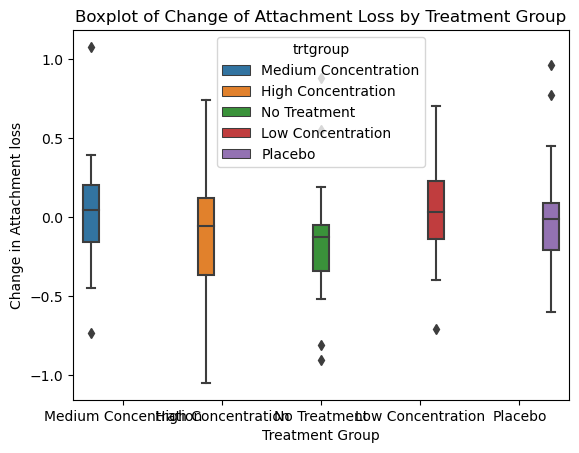

In [15]:
#Plot change in attachment loss outcome based on the treatment group
sns.boxplot(x='trtgroup',y='attachchange',hue='trtgroup', data=df).set(title="Boxplot of Change of Attachment Loss by Treatment Group",
                            xlabel='Treatment Group', ylabel='Change in Attachment loss')
#ax=sns.boxplot(x='trtgroup',y='attachchange',hue='trtgroup', data=df).set_title("Boxplot of Change of Attachment Loss by Treatment Group")
#ax.set_ylabel('Change in Attachment loss')
#ax.set_xlabel('Treatment Group')


[Text(0.5, 1.0, 'Boxplot of Change of Pocket Depth by Treatment Group'),
 Text(0.5, 0, 'Treatment Group'),
 Text(0, 0.5, 'Change in Attachment loss')]

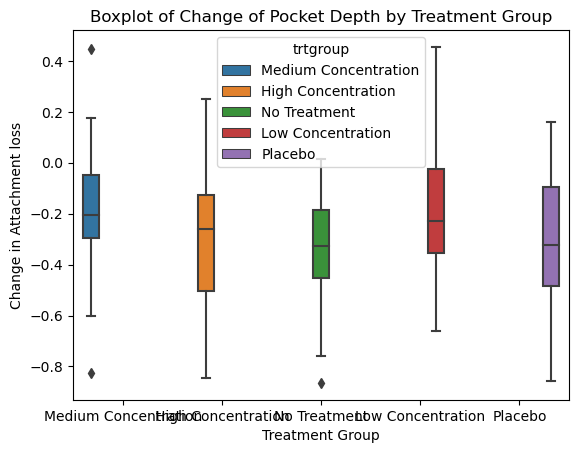

In [16]:
#Plot change in pocket depth outcome based on the treatment group
sns.boxplot(x='trtgroup',y='pdchange',hue='trtgroup', data=df).set(title="Boxplot of Change of Pocket Depth by Treatment Group",
                            xlabel='Treatment Group', ylabel='Change in Attachment loss')

In [33]:
#save file as csv
#with open("C:\\Users\\owner\\Desktop\\Data Wrangling\\Gum_Data_Modified.csv",'w') as outfile:
    #outfile.writelines(df)
    
df.to_csv("C:\\Users\\owner\\Desktop\\Data Wrangling\\Gum_Data_Modified.csv")

id              trtgroup     sex              race        age smoker  \
0  101  Medium Concentration  Female             white  44.572211    Yes   
1  102    High Concentration  Female             white  35.572895    Yes   
2  103          No Treatment  Female             white  47.945243    Yes   
3  104     Low Concentration  Female             white  55.178645    Yes   
4  105               Placebo  Female  African American  43.797399    Yes   

   sites  attachbase  attach1year    pdbase   pd1year  attachchange  pdchange  
0    162    2.432099     2.577640  3.246914  3.407407      0.145541  0.160494  
1    162    2.543210     2.101389  3.006173  2.875163     -0.441821 -0.131010  
2    144    2.881944     3.076389  3.118056  3.125000      0.194444  0.006944  
3    138    4.956522     5.304348  5.217391  4.891304      0.347826 -0.326087  
4    168    1.773810     1.452381  3.363095  2.898810     -0.321429 -0.464286